In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option("display.max_columns", 500)

In [2]:
df = pd.read_csv('C:/Users/Rajasekar/Downloads/ToyotaCorolla.csv')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [3]:
#EDA

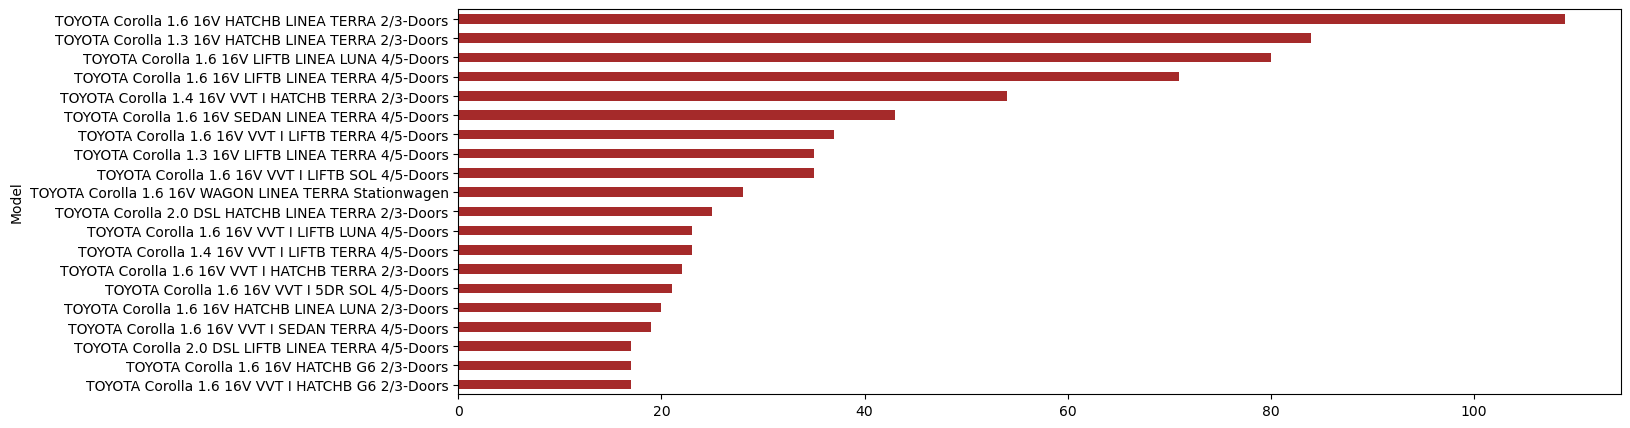

In [4]:
plt.figure(figsize=(15,5))

df["Model"].value_counts().head(20).sort_values(ascending=True)\
.plot(kind="barh", color='Brown')

plt.show()

In [5]:
features = ['Model', 'Price', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Color']
df_new = df[features].copy()
df_new.head()

,Model,Price,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Color
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,10,2002,46986,Diesel,90,Blue
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,10,2002,72937,Diesel,90,Silver
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,9,2002,41711,Diesel,90,Blue
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,7,2002,48000,Diesel,90,Black
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,3,2002,38500,Diesel,90,Black


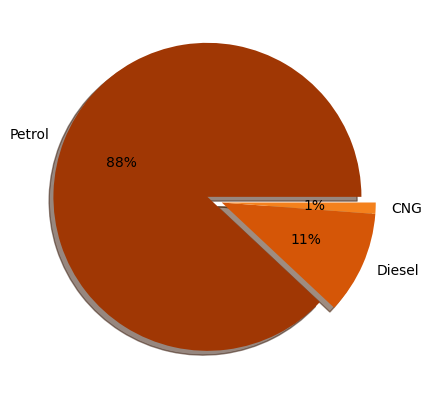

In [6]:
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("YlOrBr_r")
fuel = df_new["Fuel_Type"].value_counts()

plt.pie(data = fuel,\
        x=fuel.values, labels = fuel.index, \
        explode=(0.1,0,0), autopct='%1.0f%%', \
        shadow=True, colors=color_palette)

plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

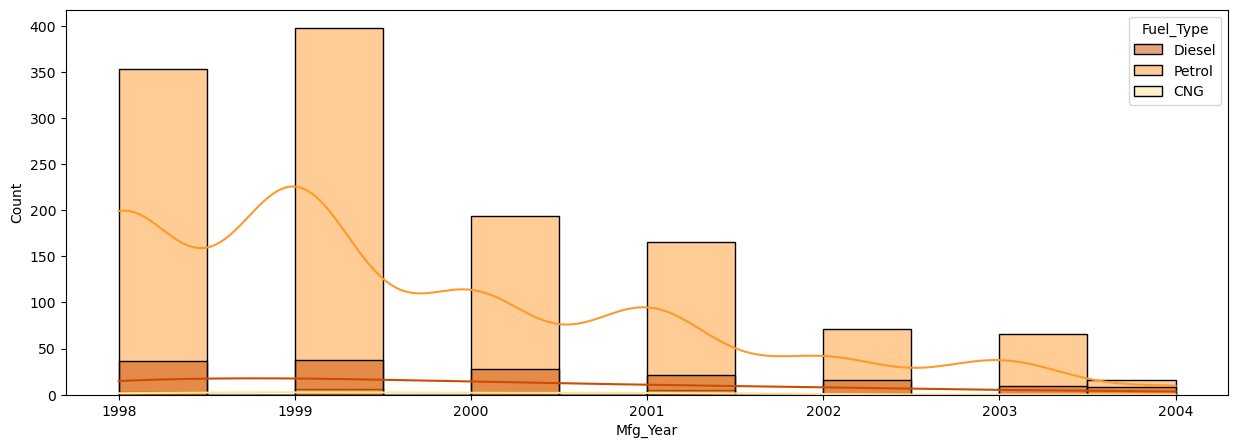

In [7]:
plt.figure(figsize=(15,5))
sns.histplot(data = df_new, x= df_new['Mfg_Year'], kde=True, hue='Fuel_Type', palette="YlOrBr_r")
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

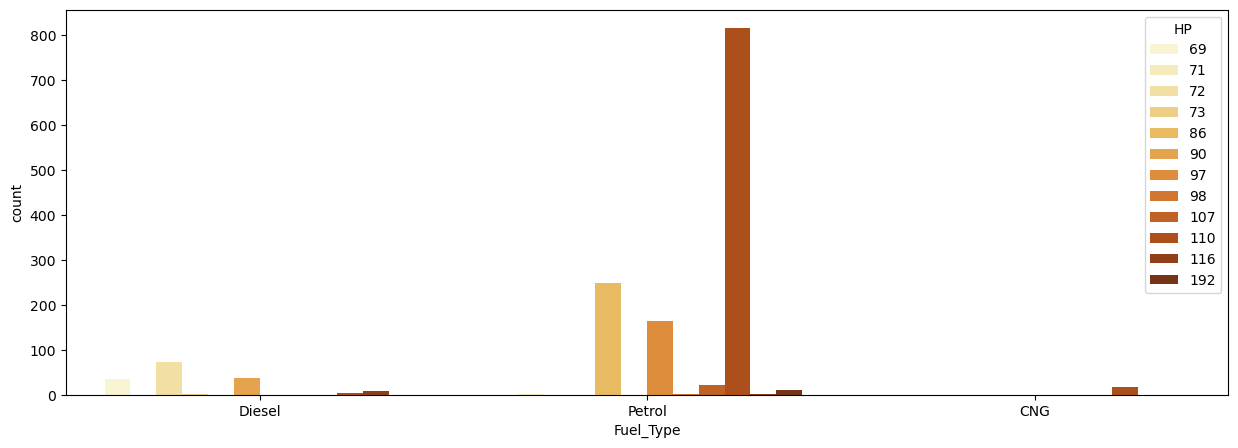

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_new, x="Fuel_Type", hue="HP", palette="YlOrBr")
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

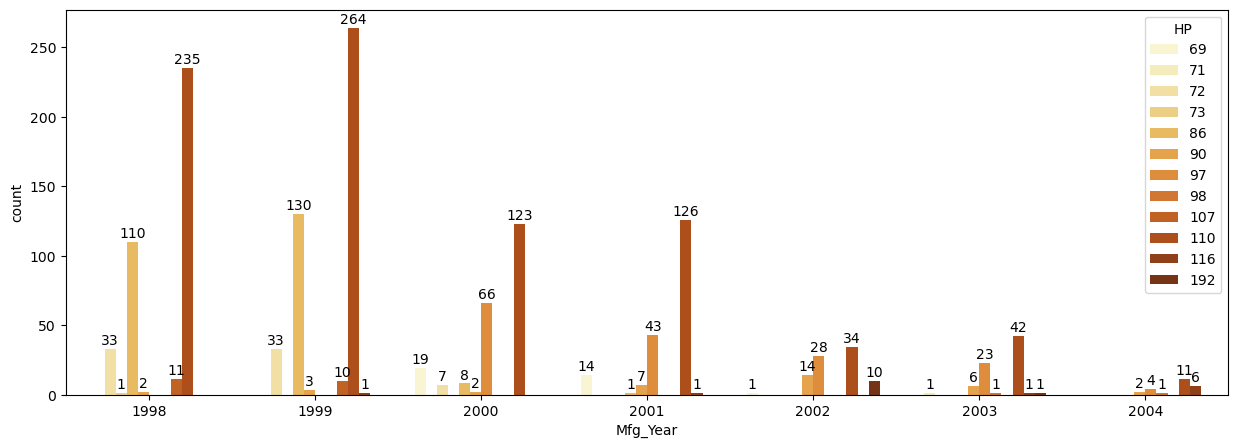

In [9]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df_new, x="Mfg_Year", hue="HP", palette="YlOrBr")

spacing = 1
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2    
    if y_value > 0:
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{}".format(int(y_value))
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                       
plt.show()

In [10]:
df.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

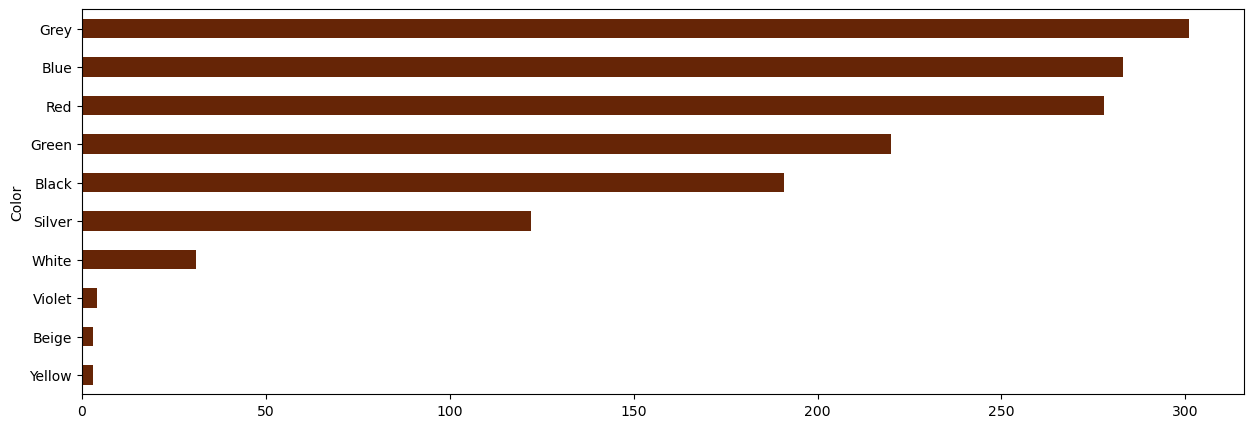

In [11]:
plt.figure(figsize=(15,5))
df_new["Color"].value_counts().sort_values(ascending=True).plot(kind="barh",colormap="YlOrBr_r")
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

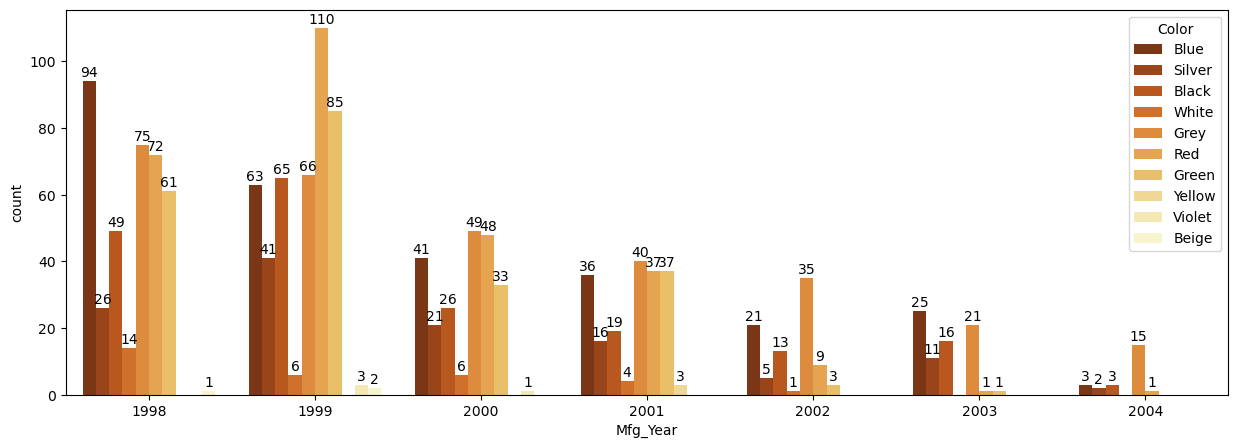

In [12]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df_new, x="Mfg_Year", hue="Color", palette="YlOrBr_r")

spacing = 1
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2    
    if y_value > 0:
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{}".format(int(y_value))
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                       
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

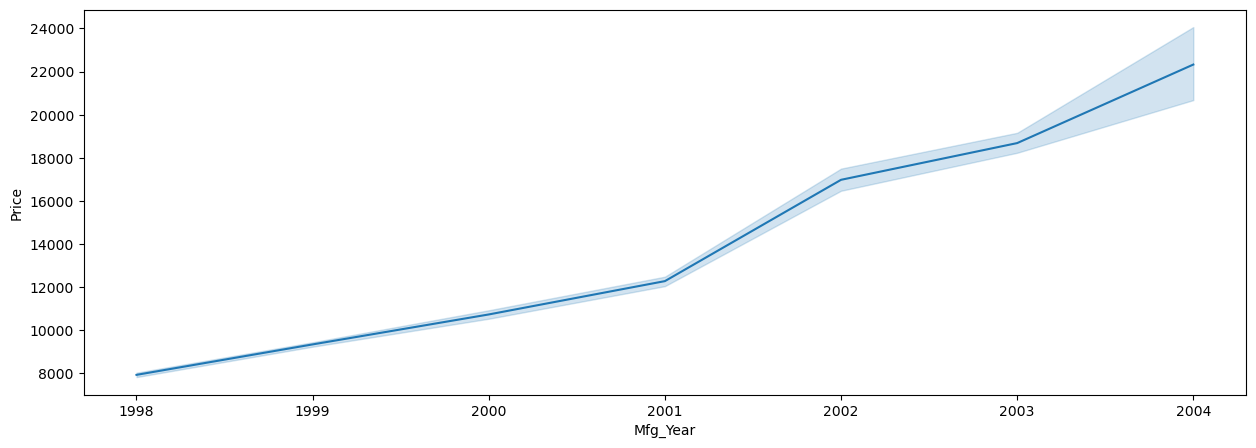

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_new, y="Price", x="Mfg_Year")
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


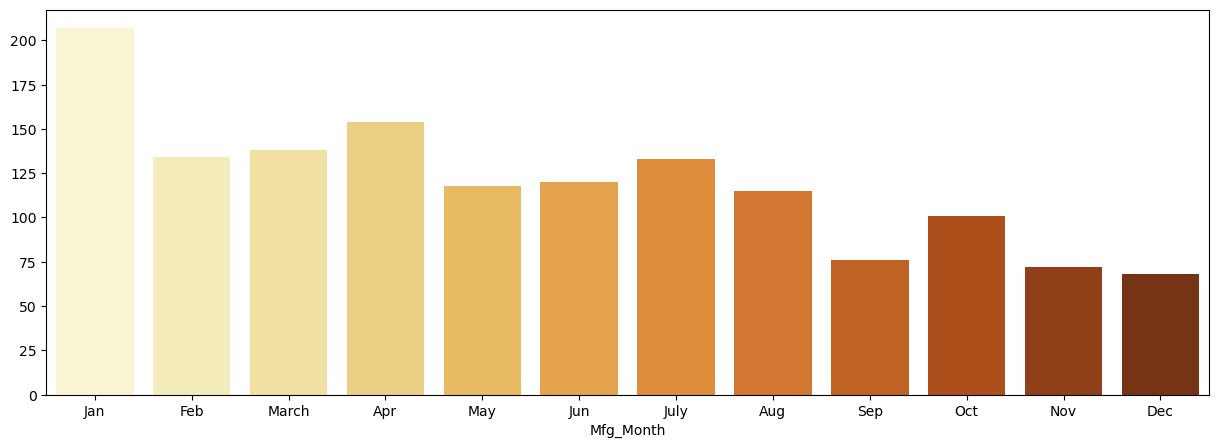

In [14]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y=df_new["Mfg_Month"].value_counts().values, x=df_new["Mfg_Month"].value_counts().index, palette='YlOrBr')
ax.set_xticklabels(["Jan", "Feb", "March", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [16]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df1 = df.drop(columns = ['Id', 'Model'], axis = 1)
df1.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0


In [18]:
#Convert Fuel_type from categorical to numerical

In [19]:
unique_values = df1['Fuel_Type'].unique()
mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}

df1['Fuel_Type_numeric'] = df1['Fuel_Type'].map(mapping_dict)
df1.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_numeric
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1


In [20]:
#Convert Color from categorical to numerical

In [21]:
unique_values = df1['Color'].unique()
mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}

df1['Color_numeric'] = df1['Color'].map(mapping_dict)
df1.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_numeric,Color_numeric
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,2
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,3
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,3


In [22]:
df2 = df1.drop(columns = ['Fuel_Type', 'Color'], axis = 1)
df2.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_numeric,Color_numeric
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,2
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,3
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,3


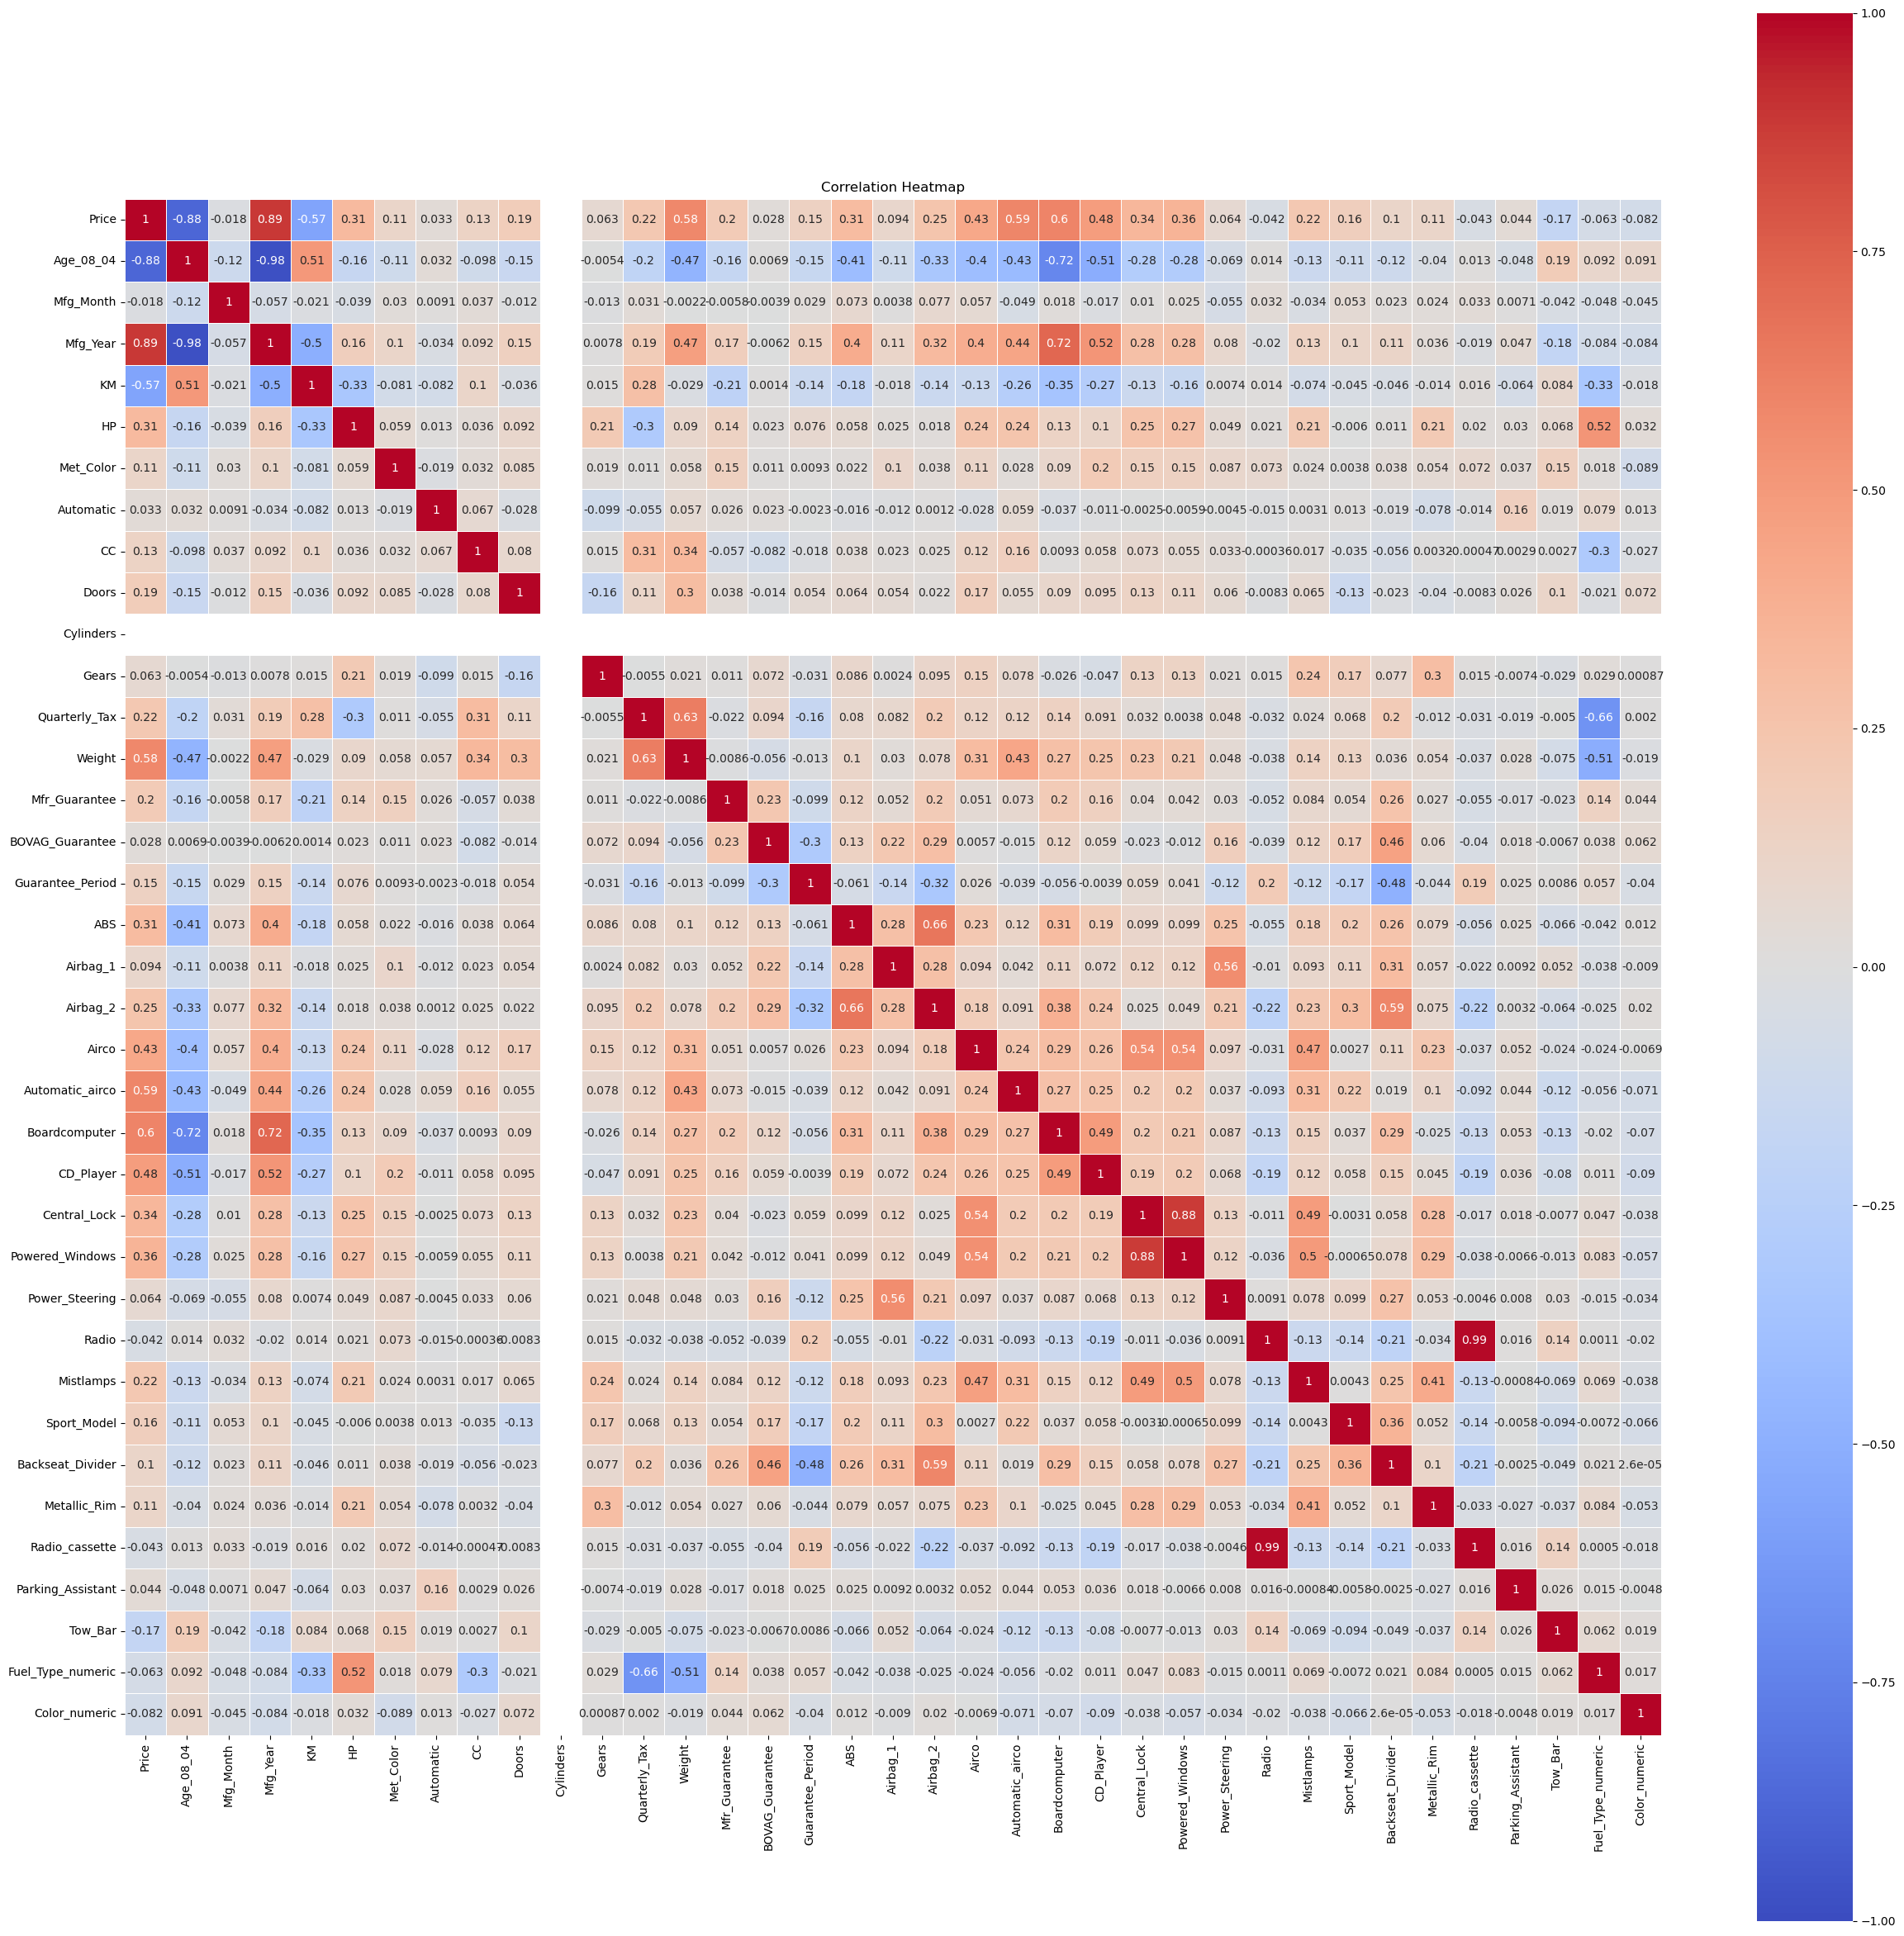

In [26]:
correlation_matrix = df2.corr()
# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [28]:
X = df2.drop(columns = ['Price'], axis = 1)
y = df2['Price']

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

C:\Users\Rajasekar\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Rajasekar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF for Age_08_04 : inf
VIF for Mfg_Month : inf
VIF for Mfg_Year : inf
VIF for KM : 1.8973991842100657
VIF for HP : 2.26106231854184
VIF for Met_Color : 1.1486279492291793
VIF for Automatic : 1.1335206520373033
VIF for CC : 1.2526815852738988
VIF for Doors : 1.2967784966564802
VIF for Cylinders : 0.0
VIF for Gears : 1.2690280213582843
VIF for Quarterly_Tax : 2.9214125017689447
VIF for Weight : 3.9151384118564936
VIF for Mfr_Guarantee : 1.2041875303232403
VIF for BOVAG_Guarantee : 1.3772223481677466
VIF for Guarantee_Period : 1.54014589311076
VIF for ABS : 2.2444616441127385
VIF for Airbag_1 : 1.6048846035364486
VIF for Airbag_2 : 3.095783087246588
VIF for Airco : 1.848385061919697
VIF for Automatic_airco : 1.7443949083212544
VIF for Boardcomputer : 2.638021435169829
VIF for CD_Player : 1.5613430849241374
VIF for Central_Lock : 4.603849434414683
VIF for Powered_Windows : 4.64121377594082
VIF for Power_Steering : 1.5580551648480618
VIF for Radio : 62.32765647812907
VIF for Mistlamps : 2.

In [30]:
X = df2.drop(columns = ['Price', 'Mfg_Month', 'Mfg_Year'], axis = 1)
y = df2['Price']

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

VIF for Age_08_04 : 4.760092505021726
VIF for KM : 1.8946190109471852
VIF for HP : 2.2597533696353524
VIF for Met_Color : 1.1472720574974393
VIF for Automatic : 1.1319040668804468
VIF for CC : 1.251223083135365
VIF for Doors : 1.2966927391595093
VIF for Cylinders : 2754.6605777982522
VIF for Gears : 1.2675246338625792
VIF for Quarterly_Tax : 2.92136215831163
VIF for Weight : 3.889108073917543
VIF for Mfr_Guarantee : 1.2038317865265233
VIF for BOVAG_Guarantee : 1.3772223245338717
VIF for Guarantee_Period : 1.5400050003461878
VIF for ABS : 2.243695580426224
VIF for Airbag_1 : 1.6047338683079115
VIF for Airbag_2 : 3.0916708381471927
VIF for Airco : 1.8462927757079335
VIF for Automatic_airco : 1.7329558411374915
VIF for Boardcomputer : 2.6136659171825913
VIF for CD_Player : 1.5532084193143698
VIF for Central_Lock : 4.600414132873742
VIF for Powered_Windows : 4.636130470483819
VIF for Power_Steering : 1.5495626368070048
VIF for Radio : 62.32106762360215
VIF for Mistlamps : 2.080334965588621

In [32]:
X = df2.drop(columns = ['Price', 'Radio', 'Mfg_Month', 'Mfg_Year'], axis = 1)
y = df2['Price']

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

VIF for Age_08_04 : 4.7590975490508125
VIF for KM : 1.8922447596768328
VIF for HP : 2.25975254765693
VIF for Met_Color : 1.1472144636920671
VIF for Automatic : 1.1318238313897304
VIF for CC : 1.2512227295093936
VIF for Doors : 1.2961785688506753
VIF for Cylinders : 2754.5923354502393
VIF for Gears : 1.2674821972031292
VIF for Quarterly_Tax : 2.919428053966091
VIF for Weight : 3.8885168013265488
VIF for Mfr_Guarantee : 1.202729424013229
VIF for BOVAG_Guarantee : 1.3770805542690223
VIF for Guarantee_Period : 1.5383903918682555
VIF for ABS : 2.2436949153387826
VIF for Airbag_1 : 1.5990004119435086
VIF for Airbag_2 : 3.087811244936072
VIF for Airco : 1.8440323136383747
VIF for Automatic_airco : 1.7310548476061243
VIF for Boardcomputer : 2.6135844984140566
VIF for CD_Player : 1.5520913145658206
VIF for Central_Lock : 4.590602463924039
VIF for Powered_Windows : 4.61545066644936
VIF for Power_Steering : 1.5400826138652417
VIF for Mistlamps : 2.068028173470875
VIF for Sport_Model : 1.478674387

In [34]:
X = df2.drop(columns = ['Price', 'Cylinders', 'Radio', 'Mfg_Month', 'Mfg_Year'], axis = 1)
y = df2['Price']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

VIF for Age_08_04 : 42.84572721618224
VIF for KM : 8.213853083426713
VIF for HP : 92.16367230439707
VIF for Met_Color : 3.5275971330982343
VIF for Automatic : 1.1832978942960877
VIF for CC : 18.477038485842716
VIF for Doors : 24.25741729825834
VIF for Gears : 596.3151563249745
VIF for Quarterly_Tax : 15.184887577084455
VIF for Weight : 662.8780202617044
VIF for Mfr_Guarantee : 2.0349668834146772
VIF for BOVAG_Guarantee : 13.111521036224286
VIF for Guarantee_Period : 3.940548346281516
VIF for ABS : 11.94704871492226
VIF for Airbag_1 : 53.75652738168036
VIF for Airbag_2 : 11.092112545929186
VIF for Airco : 3.7472147149078534
VIF for Automatic_airco : 1.8180997121005715
VIF for Boardcomputer : 3.633797200996473
VIF for CD_Player : 1.986125770499969
VIF for Central_Lock : 10.932076447949653
VIF for Powered_Windows : 10.533670705822095
VIF for Power_Steering : 69.04521277371799
VIF for Mistlamps : 2.7500610460023815
VIF for Sport_Model : 2.0202286970104337
VIF for Backseat_Divider : 11.0436

In [36]:
X = df2.drop(columns = ['Price', 'Radio', 'Mfg_Month', 'Mfg_Year'], axis = 1)
y = df2['Price']

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    print(f"VIF for {X.columns[i]} : {vif}")

VIF for Age_08_04 : 4.7590975490508125
VIF for KM : 1.8922447596768328
VIF for HP : 2.25975254765693
VIF for Met_Color : 1.1472144636920671
VIF for Automatic : 1.1318238313897304
VIF for CC : 1.2512227295093936
VIF for Doors : 1.2961785688506753
VIF for Cylinders : 2754.5923354502393
VIF for Gears : 1.2674821972031292
VIF for Quarterly_Tax : 2.919428053966091
VIF for Weight : 3.8885168013265488
VIF for Mfr_Guarantee : 1.202729424013229
VIF for BOVAG_Guarantee : 1.3770805542690223
VIF for Guarantee_Period : 1.5383903918682555
VIF for ABS : 2.2436949153387826
VIF for Airbag_1 : 1.5990004119435086
VIF for Airbag_2 : 3.087811244936072
VIF for Airco : 1.8440323136383747
VIF for Automatic_airco : 1.7310548476061243
VIF for Boardcomputer : 2.6135844984140566
VIF for CD_Player : 1.5520913145658206
VIF for Central_Lock : 4.590602463924039
VIF for Powered_Windows : 4.61545066644936
VIF for Power_Steering : 1.5400826138652417
VIF for Mistlamps : 2.068028173470875
VIF for Sport_Model : 1.478674387

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
column_names = X.columns.tolist()
print(column_names)

['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'Fuel_Type_numeric', 'Color_numeric']


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1148, 33)
(1148,)
(288, 33)
(288,)


In [43]:
#Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_lm_pred = lm_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_lm_pred)}")
R2 = r2_score(y_test, y_lm_pred)
print(f"R-squared: {R2}")

MSE: 1423940.0263925
R-squared: 0.8932801797980453


In [44]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
R2 = r2_score(y_test, y_pred)
print(f"R-squared: {R2}")

MSE: 2057300.7881944445
R-squared: 0.8458117855049804


In [45]:
model = DecisionTreeRegressor(
    criterion = 'squared_error',
    splitter = 'best',
    min_samples_split = 2,
    max_depth = 20,
    random_state = 0
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

MSE: 1765469.3645833333
R-squared: 0.8676836315657733


In [46]:
'''criterion = 'squared_error' parameter specifies the function used to measure the quality of a split. For a decision tree regressor, the commonly used criterion is mean squared error ('squared_error'), which minimizes the variance of the target variable within each leaf.
splitter = 'best' parameter specifies the strategy used to choose the split at each node. 'best' means that the algorithm will choose the best split based on the selected criterion.
min_samples_split = 2 parameter sets the minimum number of samples required to split an internal node. In this case, a node will only be split if it has at least 2 samples.
max_depth = 20 parameter limits the maximum depth of the decision tree. In this case, the tree will have a maximum depth of 20 levels.
random_state = 0 parameter sets the seed for the random number generator. This ensures reproducibility, as using the same random seed will result in the same tree structure if the data and other parameters are kept constant.'''

"criterion = 'squared_error' parameter specifies the function used to measure the quality of a split. For a decision tree regressor, the commonly used criterion is mean squared error ('squared_error'), which minimizes the variance of the target variable within each leaf.\nsplitter = 'best' parameter specifies the strategy used to choose the split at each node. 'best' means that the algorithm will choose the best split based on the selected criterion.\nmin_samples_split = 2 parameter sets the minimum number of samples required to split an internal node. In this case, a node will only be split if it has at least 2 samples.\nmax_depth = 20 parameter limits the maximum depth of the decision tree. In this case, the tree will have a maximum depth of 20 levels.\nrandom_state = 0 parameter sets the seed for the random number generator. This ensures reproducibility, as using the same random seed will result in the same tree structure if the data and other parameters are kept constant."

In [47]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
R2 = r2_score(y_test, y_pred)
print(f"R-squared: {R2}")

MSE: 960370.9105475696
R-squared: 0.9280232249946085


In [48]:
#Hist Gradient Boosting Regressor
#Without Hyperparameter
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 949439.9046491877
R-squared: 0.9288424694588977


In [49]:
model = HistGradientBoostingRegressor(
    learning_rate = 0.1,
    max_depth = 3,
    max_iter = 130,
    random_state = 42,
    scoring = 'neg_mean_squared_error',
    validation_fraction = 0.1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 886355.9664755965
R-squared: 0.9335704119387316


In [50]:
'''
learning_rate = 0.1 parameter controls the contribution of each tree to the final prediction. It scales the contribution of each tree, and a lower value makes the model more robust but may require more trees.
max_depth = 3 parameter sets the maximum depth of the individual trees in the ensemble. It limits the complexity of each tree, helping to prevent overfitting.
max_iter = 130 parameter specifies the maximum number of boosting iterations (trees) to be fit. This determines the total number of trees in the ensemble.
random_state = 42 parameter sets the seed for the random number generator. This ensures reproducibility, as using the same random seed will result in the same model if the data and other parameters are kept constant.
scoring = 'neg_mean_squared_error' parameter determines the loss function used during training. In this case, it is set to 'neg_mean_squared_error', meaning the negative mean squared error. The negative is used because scikit-learn conventionally maximizes scores, and we want to minimize the mean squared error.
validation_fraction = 0.1 parameter controls the proportion of training data to set aside as a validation set for early stopping. Early stopping can prevent overfitting by monitoring the performance on the validation set and stopping training when the performance plateaus.
'''

"\nlearning_rate = 0.1 parameter controls the contribution of each tree to the final prediction. It scales the contribution of each tree, and a lower value makes the model more robust but may require more trees.\nmax_depth = 3 parameter sets the maximum depth of the individual trees in the ensemble. It limits the complexity of each tree, helping to prevent overfitting.\nmax_iter = 130 parameter specifies the maximum number of boosting iterations (trees) to be fit. This determines the total number of trees in the ensemble.\nrandom_state = 42 parameter sets the seed for the random number generator. This ensures reproducibility, as using the same random seed will result in the same model if the data and other parameters are kept constant.\nscoring = 'neg_mean_squared_error' parameter determines the loss function used during training. In this case, it is set to 'neg_mean_squared_error', meaning the negative mean squared error. The negative is used because scikit-learn conventionally maximi

In [51]:
#Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 787426.6820649283
R-squared: 0.9409848502221768


In [53]:
#Voting Regressor
from sklearn.ensemble import VotingRegressor

reg1 = LinearRegression()
reg2 = DecisionTreeRegressor()
reg3 = RandomForestRegressor()
reg4 = HistGradientBoostingRegressor()
reg5 = GradientBoostingRegressor()

model = VotingRegressor(estimators = [('lr', reg1), ('dt', reg2), ('rf', reg3), ('hgb', reg4), ('gb', reg5)], weights = [1,1,1,2,2])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 843096.6694102576
R-squared: 0.9368125600062819


In [54]:
from sklearn.ensemble import VotingRegressor

reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best', min_samples_split = 2, max_depth = 20, random_state = 0)
reg3 = RandomForestRegressor()
reg4 = HistGradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, max_iter = 130, random_state = 42, scoring = 'neg_mean_squared_error', validation_fraction = 0.1)
reg5 = GradientBoostingRegressor()

model = VotingRegressor(estimators = [('lr', reg1), ('dt', reg2), ('rf', reg3), ('hgb', reg4), ('gb', reg5)], weights = [1,1,1,2,2])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 843575.4628690568
R-squared: 0.9367766759445307


In [55]:
#final model Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 794977.6254609614
R-squared: 0.940418930796749


In [56]:
y_hat = model.predict(X)

In [57]:
df2['Y_hat'] = y_hat

In [58]:
df2['Residuals'] = df2['Price'] - df2['Y_hat']

In [59]:
df2

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_numeric,Color_numeric,Y_hat,Residuals
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,15501.768660,-2001.768660
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,2,14981.536541,-1231.536541
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,14813.300104,-863.300104
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,3,15029.737199,-79.737199
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,3,15907.726924,-2157.726924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,2,1,8623.038168,-1123.038168
1432,10845,72,9,1998,19000,86,0,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,2,5,8626.496206,2218.503794
1433,8500,71,10,1998,17016,86,0,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,1,8176.281178,323.718822
1434,7250,70,11,1998,16916,86,1,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,5,8079.366391,-829.366391


In [60]:
df2['Residuals'] = df2['Price'] - df2['Y_hat']

In [61]:
df2

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_numeric,Color_numeric,Y_hat,Residuals
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,15501.768660,-2001.768660
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,2,14981.536541,-1231.536541
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,14813.300104,-863.300104
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,3,15029.737199,-79.737199
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,3,15907.726924,-2157.726924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,2,1,8623.038168,-1123.038168
1432,10845,72,9,1998,19000,86,0,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,2,5,8626.496206,2218.503794
1433,8500,71,10,1998,17016,86,0,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,1,8176.281178,323.718822
1434,7250,70,11,1998,16916,86,1,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,5,8079.366391,-829.366391


In [62]:
#Check Assumptions of Regression

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

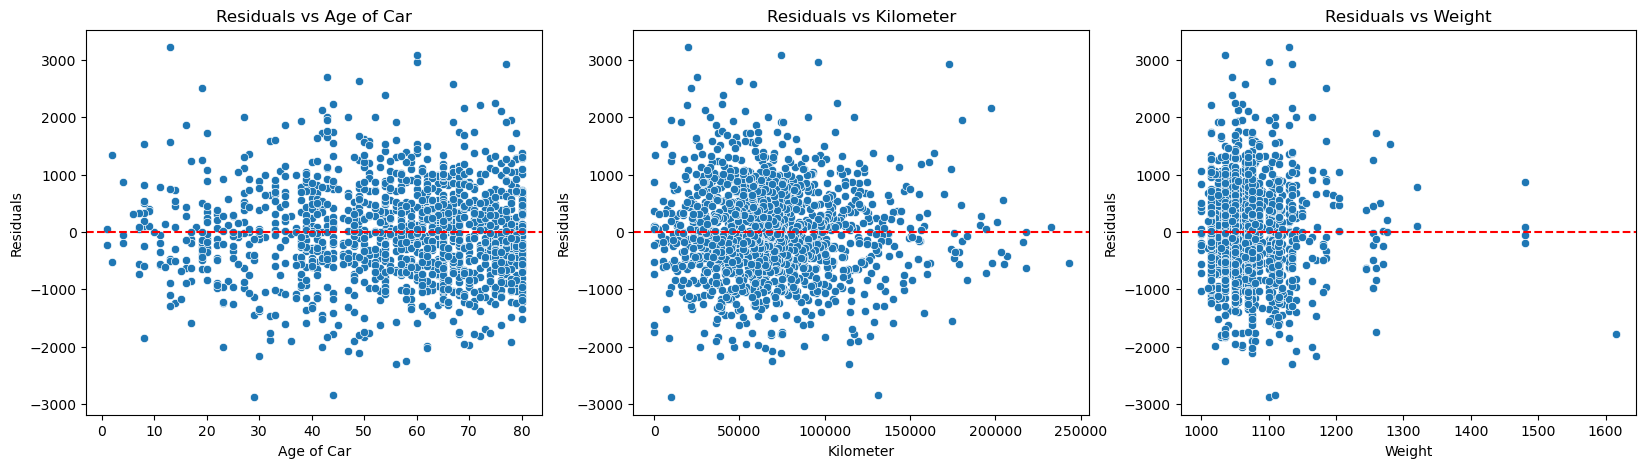

In [63]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(hspace=0.6)

plt.subplot(1,3,1)
sns.scatterplot(df2, x = 'Age_08_04', y = 'Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Age of Car')
plt.ylabel('Residuals')
plt.title('Residuals vs Age of Car')

plt.subplot(1,3,2)
sns.scatterplot(df2, x = 'KM', y = 'Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Kilometer')
plt.ylabel('Residuals')
plt.title('Residuals vs Kilometer')

plt.subplot(1,3,3)
sns.scatterplot(df2, x = 'Weight', y = 'Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Weight')
plt.ylabel('Residuals')
plt.title('Residuals vs Weight')

plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


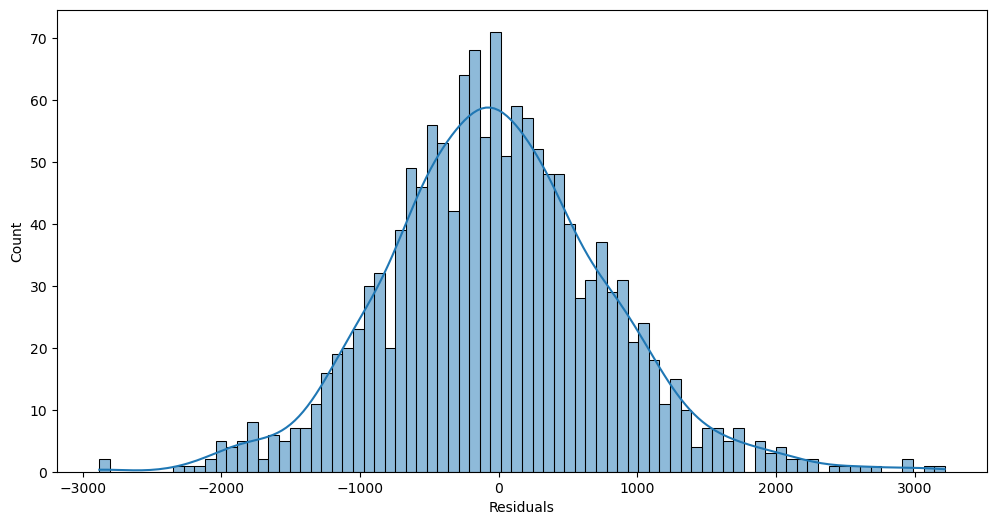

In [64]:
plt.figure(figsize = (12, 6))
sns.histplot(df2, x = 'Residuals', bins = 80, kde = True)
plt.show()

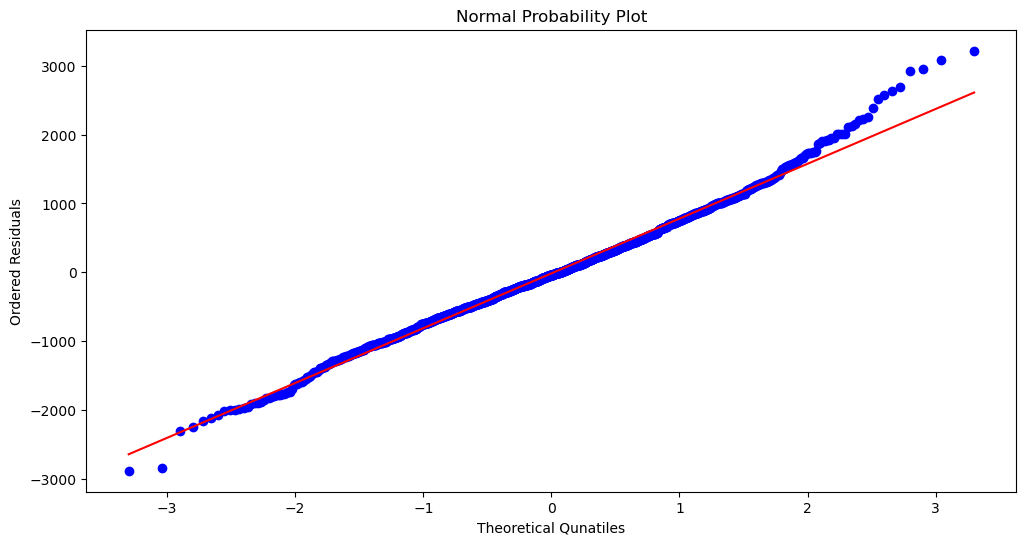

In [65]:
from scipy.stats import probplot
plt.figure(figsize = (12, 6))

probplot(df2['Residuals'], dist = 'norm', plot = plt)
plt.title("Normal Probability Plot")
plt.xlabel("Theoretical Qunatiles")
plt.ylabel("Ordered Residuals")
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


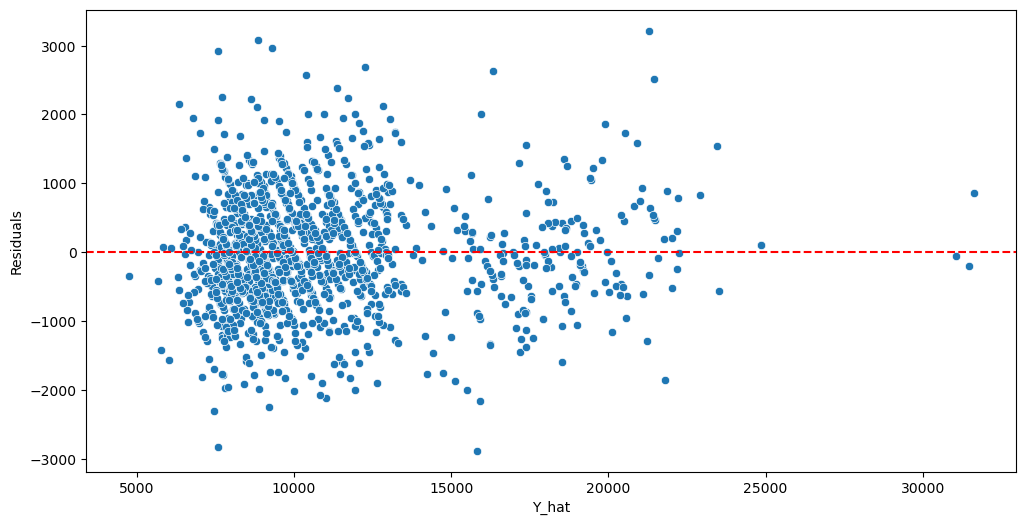

In [66]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df2, x = 'Y_hat', y = 'Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

In [67]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 789711.7768319604
R-squared: 0.9408135895664174


In [68]:
import joblib
joblib.dump(model, 'final_model.pkl')

['final_model.pkl']